# Example Karstolution run

This notebook has a few extra features to let users upload their own forcing file when run on http://mybinder.org .


In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function, division, unicode_literals
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import io
from IPython.display import FileLinks

In [3]:
# this lets us use karstolution without installing it
import sys
import os
sys.path.append(os.path.abspath('..'))

In [4]:
from Karstolution import karstolution

## Time-dependent forcing

The upload button, below, is specifically intended for use on mybinder.org.  If nothing is uploaded, or the upload fails, `monthly-forcing.csv` is read from the working directory.  On Azure Notebooks, for instance, use the `Data->Upload` menu instead to upload your own `monthly-forcing.csv`.


In [5]:
# Boilerplate
import io
import fileupload


def upload():
    """Create an upload files button that prints the file name and file size.
    """

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(filename, len(decoded.read()) / 2 **10))

    _upload_widget.observe(_cb, names='data')
    
    return _upload_widget

up = upload()
up

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

In [6]:
if len(up.data) == 0:
    # user hasn't uploaded anything, use a default
    monthly_forcing_data = 'monthly-forcing.csv'
else:
    monthly_forcing_data = io.BytesIO(up.data)

In [7]:
df_input = pd.read_csv(monthly_forcing_data, index_col=0, parse_dates=True)
# remove spaces from column names, and convert to lower case
df_input.columns = [itm.lower().strip() for itm in df_input.columns]
df_input.index.name = df_input.index.name.lower().strip()
df_input.head()

,tt,mm,evpt,prp,tempp,d18o
time,,,,,,
2006-01-31,673,1,74.043546,27.100014,18.860161,-11.820000
2006-02-28,674,2,68.983931,3.200008,19.976964,-3.033644
2006-03-31,675,3,60.979251,32.700040,20.189355,-5.786757
2006-04-30,676,4,47.911463,42.099900,16.452167,-3.862741
2006-05-31,677,5,50.195356,56.199900,15.142258,-3.022970


Text(0.5,1,'Model forcing')

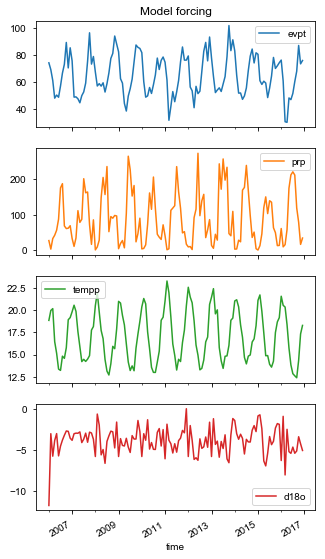

In [8]:
ax = df_input[['evpt','prp','tempp','d18o']].plot(subplots=True)
ax[0].figure.set_size_inches([5,10])
ax[0].set_title('Model forcing')

## Static configuration

The configuration is passed to the main model routine as a `dict`, i.e. a Python dictionary.  In this example, we don't read the configuration from an external file so any changes should be made here.


In [9]:
config = {'epicap': 12.0,
 'epikarst': 14.0,
 'evaporation_scale_factor': 1.0,
 'f1': 1.0,
 'f3': 0,
 'f4': 0.5,
 'f5': 0.15,
 'f6': 0.015,
 'f7': 0.02,
 'f8': 0.0,
 'i': 0.25,
 'initial_conditions': {'d18o_diffuse': -4.0,
                        'd18o_epikarst': -3.6,
                        'd18o_ks1': -4.0,
                        'd18o_ks2': -5.0,
                        'd18o_prevrain': -6.0,
                        'd18o_soil': -3.6,
                        'diffuse': 30.0,
                        'epikarst': 20.0,
                        'ks1': 70.0,
                        'ks2': 5000.0,
                        'soil': 150.0},
 'j': 0.5,
 'k': 0.25,
 'k_d18o_epi': 0.0001,
 'k_d18o_soil': 0.0001,
 'k_diffuse': 0.5,
 'k_eevap': 0.1,
 'k_weibull': 3,
 'ks1': 900.0,
 'ks2': 10000.0,
 'lambda_weibull': 1.5,
 'm': 0.25,
 'mixing_parameter_phi': 1.0,
 'monthly_forcing': {'cave_pco2': [1668.6,
                                   2417.9,
                                   2587.8,
                                   1406.0,
                                   641.1,
                                   447.0,
                                   338.7,
                                   340.1,
                                   319.7,
                                   392.0,
                                   777.5,
                                   792.6],
                     'cave_temp': [14.7,
                                   14.7,
                                   14.7,
                                   14.7,
                                   14.7,
                                   14.7,
                                   14.7,
                                   14.7,
                                   14.7,
                                   14.7,
                                   14.7,
                                   14.7],
                     'drip_interval': [198.0,
                                       198.0,
                                       200.0,
                                       200.0,
                                       200.0,
                                       200.0,
                                       203.088,
                                       209.0,
                                       233.0,
                                       215.0,
                                       201.0,
                                       214.392],
                     'driprate_store_empty' : [0.0,
                                               0.0,
                                               0.0,
                                               0.0,
                                               0.0,
                                               0.0,
                                               0.0,
                                               0.0,
                                               0.0,
                                               0.0,
                                               0.0,
                                               0.0],
                     'driprate_store_full' :  [0.01,
                                               0.01,
                                               0.01,
                                               0.01,
                                               0.01,
                                               0.01,
                                               0.01,
                                               0.01,
                                               0.01,
                                               0.01,
                                               0.01,
                                               0.01],
                     'drip_pco2': [3250.0,
                                   6208.3,
                                   4907.5,
                                   3350.0,
                                   1725.2,
                                   2306.7,
                                   1031.9,
                                   1005.8,
                                   1380.5,
                                   1438.3,
                                   2468.8,
                                   2435.0],
                     'rel_humidity': [0.94,
                                      0.93,
                                      0.95,
                                      0.94,
                                      0.93,
                                      0.95,
                                      0.9415,
                                      0.92,
                                      0.9186,
                                      0.9172,
                                      0.925,
                                      0.906333],
                     'ventilation': [0.337,
                                     0.062,
                                     0.0,
                                     0.433,
                                     0.713,
                                     0.784,
                                     0.824,
                                     0.824,
                                     0.831,
                                     0.805,
                                     0.663,
                                     0.658]},
 'n': 0.75,
 'ovicap': 600.0,
 'precipitation_scale_factor': 3.0,
 'soilstore': 500.0,
 'use_new_weibull_definition': True,
 'weibull_delay_months': 12}

In [10]:
model_output = karstolution(config, df_input, calculate_drip=True)

## Plot results

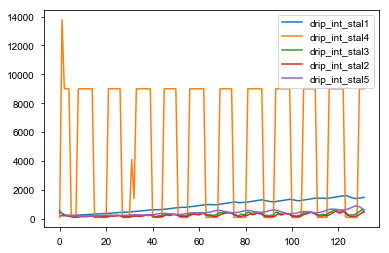

In [11]:
drip_cols = [itm for itm in model_output.columns if itm.startswith('drip')]
model_output[drip_cols].plot()

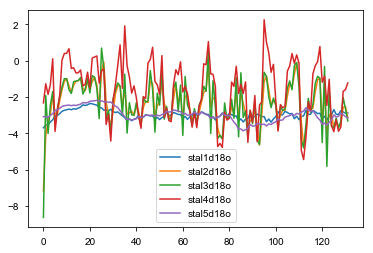

In [12]:
stal_cols = [itm for itm in model_output.columns if itm.startswith('stal') and '18o' in itm]
model_output[stal_cols].plot()

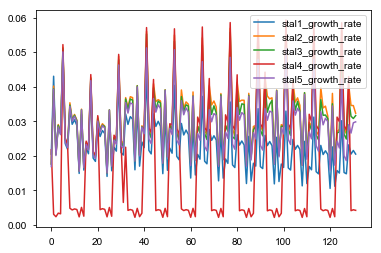

In [13]:
growth_rate_cols = [itm for itm in model_output.columns if itm.startswith('stal') and 'growth_rate' in itm]
model_output[growth_rate_cols].plot()

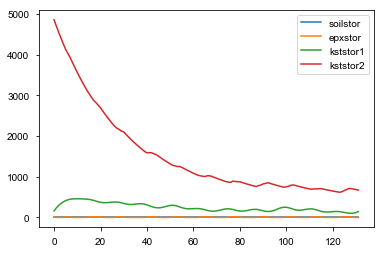

In [14]:
store_cols = ['soilstor', 'epxstor', 'kststor1','kststor2']
model_output[store_cols].plot()

### Model output as csv files

Click on the links below to download the input or output files

In [15]:
model_output.to_csv('model_output.csv')
FileLinks('./', included_suffixes=['.csv'], recursive=False)

./
  monthly-forcing.csv
  model_output.csv